<a href="https://colab.research.google.com/github/RafaelAnga/AI_Learning/blob/main/xgboost_classifier_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoost Classifier

## Part 1 - Data Preprocessing

### Importing the dataset

In [61]:
# Used to connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
 # Library necesary to access the folder route
import os
os.chdir('/content/drive/MyDrive/Machine Learning/Classification Templates/DataSet')

#Lists the available directories
os.listdir()

['Social_Network_Ads.csv', 'churn_modelling.csv']

In [64]:
import pandas as pd
dataset = pd.read_csv('churn_modelling.csv')

### Checking missing data

In [65]:
dataset.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [66]:
dataset.isnull().sum()

,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


### Handling categorical variables

CustomerId and Surname columns

In [67]:
dataset.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

In [68]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Geography column

In [69]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [70]:
geography_dummies = pd.get_dummies(dataset['Geography'], drop_first=True)

In [71]:
geography_dummies

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,True,False


In [72]:
geography_dummies = pd.get_dummies(dataset['Geography'], drop_first = True)

In [73]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [74]:
dataset = pd.concat([geography_dummies, dataset], axis = 1)

In [ ]:
dataset.head()

In [75]:
dataset.drop('Geography', axis=1, inplace=True)

Gender column

In [76]:
dataset['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [77]:
dataset['Gender'] = dataset['Gender'].apply(lambda x: 0 if x == 'Female' else 1)

In [78]:
dataset.head(10)

,Germany,Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,619,0,42,2,0.00,1,1,1,101348.88,1
1,False,True,608,0,41,1,83807.86,1,0,1,112542.58,0
2,False,False,502,0,42,8,159660.80,3,1,0,113931.57,1
3,False,False,699,0,39,1,0.00,2,0,0,93826.63,0
4,False,True,850,0,43,2,125510.82,1,1,1,79084.10,0
5,False,True,645,1,44,8,113755.78,2,1,0,149756.71,1
6,False,False,822,1,50,7,0.00,2,1,1,10062.80,0
7,True,False,376,0,29,4,115046.74,4,1,0,119346.88,1
8,False,False,501,1,44,4,142051.07,2,0,1,74940.50,0
9,False,False,684,1,27,2,134603.88,1,1,1,71725.73,0


### Creating the Training Set and the Test Set

Getting the inputs and output

Getting the Training Set and the Test Set

In [79]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Part 2 - Building and training the model

### Building the model

In [81]:
!pip install scikit-learn==1.5.2

In [82]:
from xgboost import XGBClassifier
classifier = XGBClassifier(max_depth = 3, learning_rate = 0.2, n_estimators = 100, subsample = 1.0)

### Training the model

In [83]:
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Inference

In [84]:
y_pred = classifier.predict(X_test)

In [85]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [86]:
y_test

array([0, 1, 0, ..., 0, 0, 0])

### Predicting the result of a single observation

In [87]:
result = classifier.predict([[600, 1, 40, 3, 60000, 2, 1, 1, 50000, 1, 0]])

In [88]:
result

array([0])

**Homework**

Use our model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer?

**Solution**

Therefore, our model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "0, 0" in the first two columns. That's because of course the predict method expects the dummy values of the Geography variable.

## Part 3: Evaluating the model

### Making the Confusion Matrix

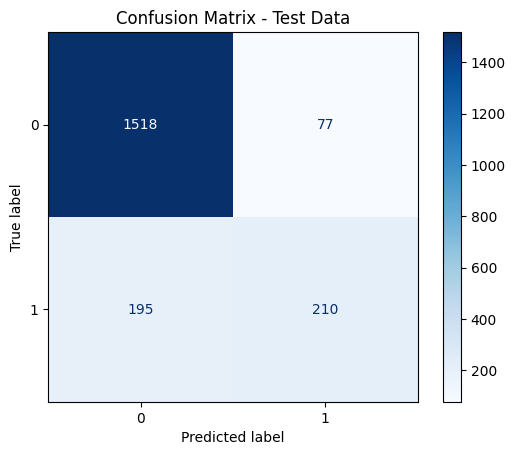

Accuracy score 86.4%


In [89]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Test Data")
plt.show()
ac = accuracy_score(y_test, y_pred)
print(f"Accuracy score {ac*100}%")

### Accuracy

In [90]:
(1526+214)/(1526+69+191+214)

0.87

### k-Fold Cross Validation

In [91]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
accuracies = cross_val_score(estimator=classifier,
                            X=X,
                            y=y,
                            scoring='accuracy',
                            cv=10)


print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Average Accuracy: 86.50 %
Standard Deviation: 0.95 %


In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from xgboost import XGBClassifier  # Ensure you have imported the classifier

# Define the model
classifier = XGBClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees
    'max_depth': [3, 5, 7],              # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2],   # Step size shrinkage
    'subsample': [0.8, 1.0],             # Fraction of samples used for fitting
    'colsample_bytree': [0.8, 1.0],      # Fraction of features used for fitting
}

# Use accuracy as the scoring metric
scorer = "accuracy"

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=param_grid,
    scoring=scorer,  # Use accuracy here
    cv=5,            # Number of cross-validation folds
    verbose=2,       # For detailed output
    n_jobs=-1        # Use all available CPUs
)

# Fit the grid search to the data
grid_search.fit(X, y)

# Print the best parameters and the best accuracy score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best Accuracy Score: 0.8663000000000001
